In [268]:
import networkx as nx

In [269]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [270]:
%matplotlib inline

Analysing the basic of networks using the data set from the citation dataset.

In [271]:
path = './Data/cit-HepTh.txt'

In [272]:
# Defining the empty directed graph object.
H = nx.DiGraph()

In [273]:
df = pd.read_csv(path, sep='\t')

In [274]:
df.head()

,# FromNodeId,ToNodeId
0,1001,9304045
1,1001,9308122
2,1001,9309097
3,1001,9311042
4,1001,9401139


In [275]:
df.shape

(352807, 2)

In [276]:
for i in list(range(0, len(df),1)):
    H.add_edge(df['# FromNodeId'][i],df['ToNodeId'][i])

In [277]:
len(H)

27770

In [278]:
len(df['# FromNodeId'].unique())

#There is a discrepancy here, because in this the nodes that do not have a out degree are not here.

25059

In [279]:
len(H.edges())

352807

In [280]:
Nodes = np.array(H.nodes())

In [281]:
Degree_Df = pd.DataFrame()

In [ ]:
for k in list(range(0,len(Nodes),1)):

    Degree_Df[k] = [Nodes[k], H.in_degree(Nodes[k]), H.out_degree(Nodes[k])]

    if(k % 1000 == 0):
        print(k,' Nodes processed')

#There might be a faster way to do this.


In [283]:
 Degree_Df = Degree_Df.transpose()

In [284]:
Degree_Df.columns = ['Nodes', 'InDegree', 'OutDegree']

In [285]:
Degree_Df.shape
Degree_Df['Dummy'] = 1

In [286]:
Degree_Df.head()

,Nodes,InDegree,OutDegree,Dummy
0,1001,10,83,1
1,9304045,16,1,1
2,9308122,115,7,1
3,9309097,140,4,1
4,9311042,55,2,1


In [287]:
OutD_F = Degree_Df.groupby('OutDegree').count()

In [288]:
OutD_F['FreqR'] = OutD_F['Nodes']/len(Nodes)

In [289]:
OutD_F.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            214, 216, 226, 246, 263, 274, 289, 302, 359, 562],
           dtype='int64', name='OutDegree', length=156)

In [290]:
#This is a log log plot and this one is a broad distribution

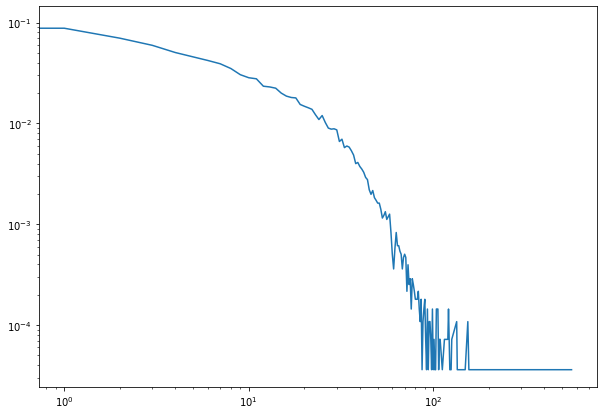

In [291]:
plt.figure(figsize=(10,7))
plt.plot(OutD_F.index,OutD_F['FreqR'])
plt.yscale('log')
plt.xscale('log')

In [292]:
InD_F = Degree_Df.groupby('InDegree').count()

In [293]:
InD_F.head()

,Nodes,OutDegree,Dummy
InDegree,,,
0,4590,4590,4590
1,3787,3787,3787
2,2700,2700,2700
3,1992,1992,1992
4,1643,1643,1643


In [294]:
InD_F['FreqR'] = InD_F['Nodes']/len(Nodes)

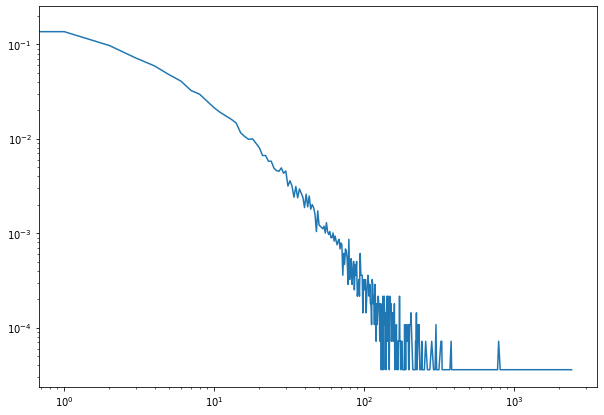

In [295]:
plt.figure(figsize=(10,7))
plt.plot(InD_F.index,InD_F['FreqR'])
plt.yscale('log')
plt.xscale('log')